<a href="https://colab.research.google.com/github/aaabbbdddeee/MAT_422/blob/main/Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Spectral Graph Bipartitioning***

Section 4.2, "Spectral Graph Bipartitioning," discusses the challenge of partitioning a graph in a way that minimizes the cut, defined as the total number of edges between two disjoint sets of nodes. For a weighted graph
G=(V,E), the objective is to divide the set of vertices
V into two disjoint subsets V1 and V2 such that the cut(V1,V2) is minimized. This cut is represented mathematically, and the concept is extended to partitions into k subsets.

The partition vector p is introduced to capture the division of vertices, with values of +1 or -1 indicating the subset to which each vertex belongs. The cut is then characterized using the Rayleigh Quotient, which relates to the Laplacian matrix L of the graph.

In practical applications, an objective function is needed to balance cuts. This function, denoted Q(V1,V2), minimizes the cut value while ensuring balance between the partitions. It involves a diagonal matrix W with weights for each vertex.

In [13]:
import numpy as np
import scipy
import pandas as pd
from itertools import cycle
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [7]:
def laplacian(A):
    D = numpy.zeros(A.shape)
    w = numpy.sum(A, axis=0)
    D.flat[::len(w) + 1] = w ** (-0.5)  # set the diag of D to w
    return D.dot(A).dot(D)

def k_means(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1231)
    return kmeans.fit(X).labels_

def spectral_clustering(affinity, n_clusters, cluster_method=k_means):
    L = laplacian(affinity)
    eig_val, eig_vect = scipy.sparse.linalg.eigs(L, n_clusters)
    X = eig_vect.real
    rows_norm = numpy.linalg.norm(X, axis=1, ord=2)
    Y = (X.T / rows_norm).T
    labels = cluster_method(Y, n_clusters)
    return labels

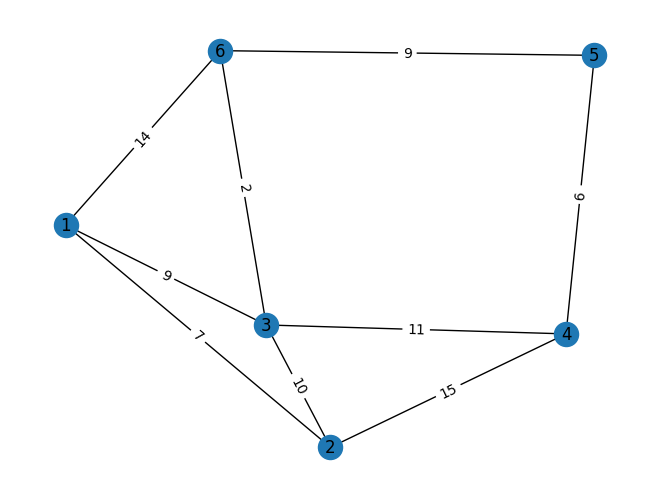

In [10]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Create a weighted graph
G = nx.Graph()
G.add_weighted_edges_from([
  (1, 2, 7),
  (1, 3, 9),
  (1, 6, 14),
  (2, 3, 10),
  (2, 4, 15),
  (3, 4, 11),
  (3, 6, 2),
  (4, 5, 6),
  (5, 6, 9),
])
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()
